# Clustering Project

## Mall Customer Segmentation

## Introduction

This is kaggle project in this [link](https://www.kaggle.com/datasets/vjchoudhary7/customer-segmentation-tutorial-in-python). This proeject uses a dataset on mall visitor. The data set contains customer id data, Age, Annual income and Spending Score. The name of the file is `Mall Customer.csv`.

We will be using the customer data in this case four features to cluster the mall customer data. This unsupervised learning will be use 3 algorithm in order to create the clustering

There will be four features, one categorical and three continuous features
- CustomerID                 int64
- Gender                    object
- Age                        int64
- Annual Income (k$)         int64
- Spending Score (1-100)     int64


In [1]:
def warn(*args, **kwargs):
    pass
import warnings
warnings.warn = warn

import seaborn as sns, pandas as pd, numpy as np

In [11]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt 
import seaborn as sns 
import plotly as py
import plotly.graph_objs as go
from sklearn.cluster import KMeans
import warnings
import os
warnings.filterwarnings("ignore")
py.offline.init_notebook_mode(connected = True)
#print(os.listdir("../input"))

In [193]:
df = pd.read_csv('Mall_Customers.csv')
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [19]:
df.shape

(200, 5)

The data types for each entry. The implementation of K-means in Scikit-learn is designed only to work with continuous data (even though it is sometimes used with categorical or boolean types). We will use one categorical feature , Gender, at current project.


In [21]:
df.dtypes

CustomerID                 int64
Gender                    object
Age                        int64
Annual Income (k$)         int64
Spending Score (1-100)     int64
dtype: object

### EDA

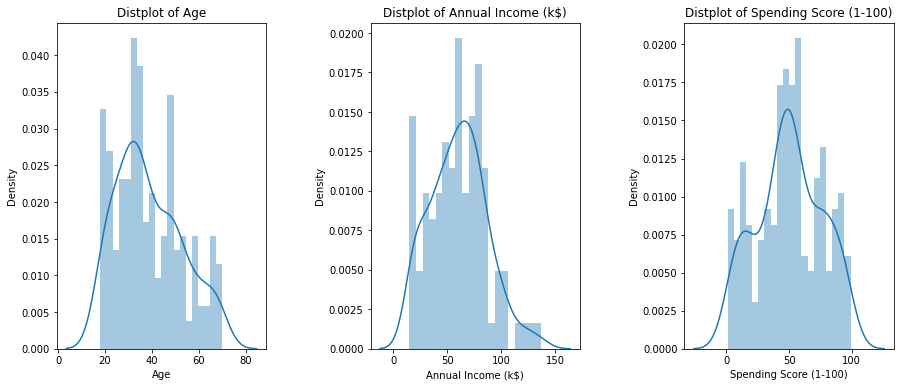

In [22]:
plt.figure(1 , figsize = (15 , 6))
n = 0 
for x in ['Age' , 'Annual Income (k$)' , 'Spending Score (1-100)']:
    n += 1
    plt.subplot(1 , 3 , n)
    plt.subplots_adjust(hspace =0.5 , wspace = 0.5)
    sns.distplot(df[x] , bins = 20)
    plt.title('Distplot of {}'.format(x))
plt.show()

Age features seems right skew whether Annual income and Spending score seems normal distributed

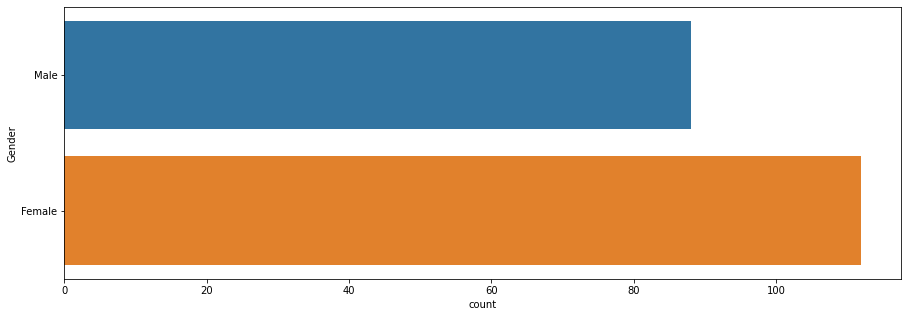

In [23]:
plt.figure(1 , figsize = (15 , 5))
sns.countplot(y = 'Gender' , data = df)
plt.show()

Total number of Female Mall Customer  is higher than male customer 

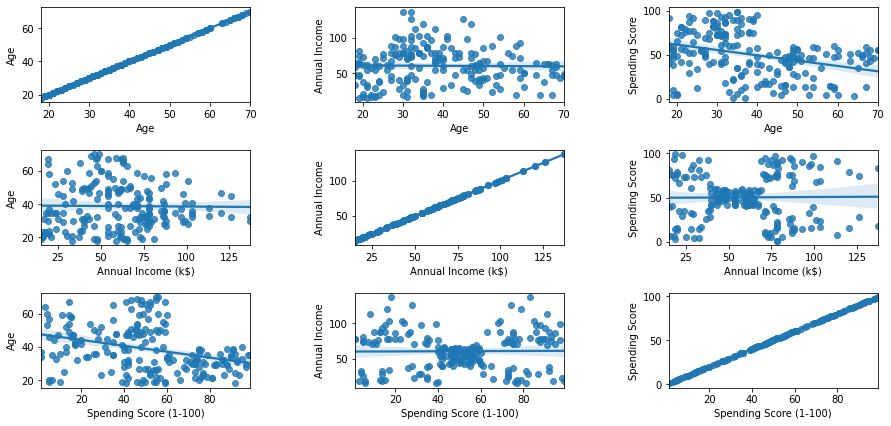

In [24]:
plt.figure(1 , figsize = (15 , 7))
n = 0 
for x in ['Age' , 'Annual Income (k$)' , 'Spending Score (1-100)']:
    for y in ['Age' , 'Annual Income (k$)' , 'Spending Score (1-100)']:
        n += 1
        plt.subplot(3 , 3 , n)
        plt.subplots_adjust(hspace = 0.5 , wspace = 0.5)
        sns.regplot(x = x , y = y , data = df)
        plt.ylabel(y.split()[0]+' '+y.split()[1] if len(y.split()) > 1 else y )
plt.show()

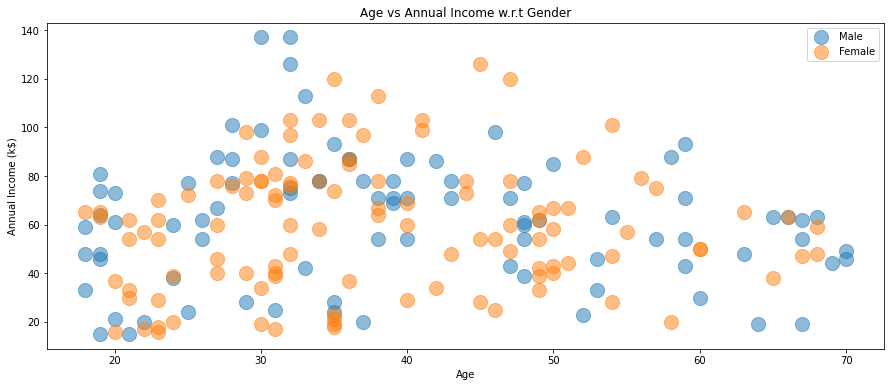

In [25]:
plt.figure(1 , figsize = (15 , 6))
for gender in ['Male' , 'Female']:
    plt.scatter(x = 'Age' , y = 'Annual Income (k$)' , data = df[df['Gender'] == gender] ,
                s = 200 , alpha = 0.5 , label = gender)
plt.xlabel('Age'), plt.ylabel('Annual Income (k$)') 
plt.title('Age vs Annual Income w.r.t Gender')
plt.legend()
plt.show()

Male and female customers are distributed in all age and annual income

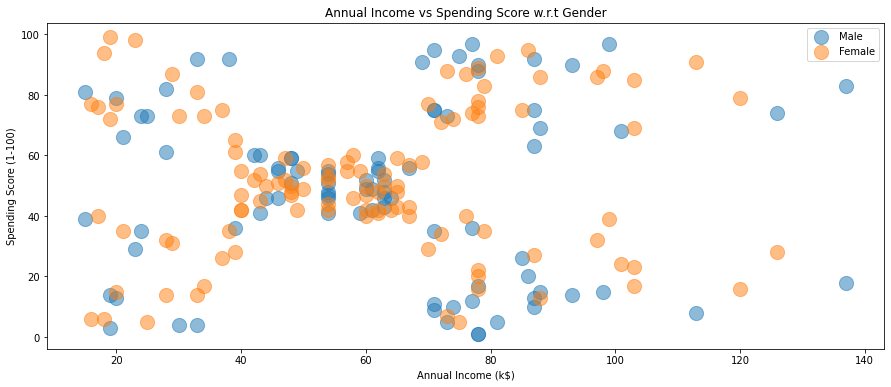

In [26]:
plt.figure(1 , figsize = (15 , 6))
for gender in ['Male' , 'Female']:
    plt.scatter(x = 'Annual Income (k$)',y = 'Spending Score (1-100)' ,
                data = df[df['Gender'] == gender] ,s = 200 , alpha = 0.5 , label = gender)
plt.xlabel('Annual Income (k$)'), plt.ylabel('Spending Score (1-100)') 
plt.title('Annual Income vs Spending Score w.r.t Gender')
plt.legend()
plt.show()

Male and female customers are distributed in all Spending Score and annual income

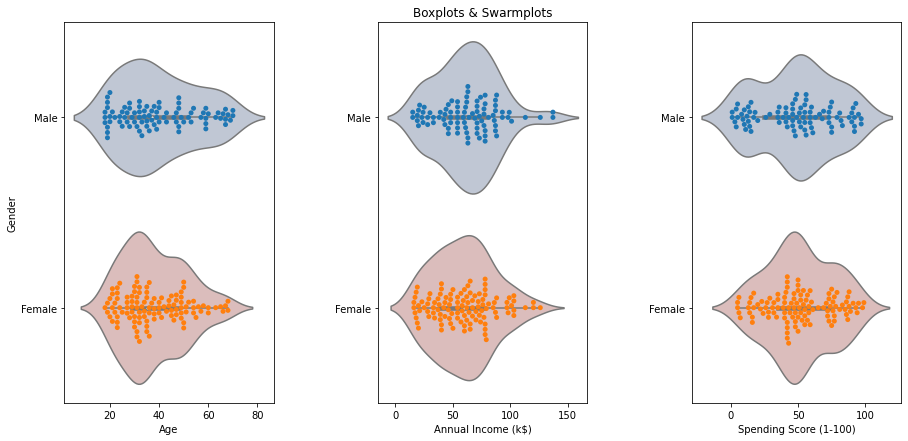

In [27]:
plt.figure(1 , figsize = (15 , 7))
n = 0 
for cols in ['Age' , 'Annual Income (k$)' , 'Spending Score (1-100)']:
    n += 1 
    plt.subplot(1 , 3 , n)
    plt.subplots_adjust(hspace = 0.5 , wspace = 0.5)
    sns.violinplot(x = cols , y = 'Gender' , data = df , palette = 'vlag')
    sns.swarmplot(x = cols , y = 'Gender' , data = df)
    plt.ylabel('Gender' if n == 1 else '')
    plt.title('Boxplots & Swarmplots' if n == 2 else '')
plt.show()

#### Categorical features handling

In [34]:
df_final=pd.get_dummies(df)

In [35]:
df_final.head()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100),Gender_Female,Gender_Male
0,1,19,15,39,0,1
1,2,21,15,81,0,1
2,3,20,16,6,1,0
3,4,23,16,77,1,0
4,5,31,17,40,1,0


In [36]:
df_final=df_final.drop('Gender_Male',axis=1)

In [37]:
df_final.head()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100),Gender_Female
0,1,19,15,39,0
1,2,21,15,81,0
2,3,20,16,6,1
3,4,23,16,77,1
4,5,31,17,40,1


In [38]:
df_final=df_final.drop('CustomerID',axis=1)

## KMEANS

In [39]:
### BEGIN SOLUTION
# Create and fit a range of models
km_list = list()

for clust in range(1,21):
    km = KMeans(n_clusters=clust, random_state=42)
    km = km.fit(df_final)
    
    km_list.append(pd.Series({'clusters': clust, 
                              'inertia': km.inertia_,
                              'model': km}))

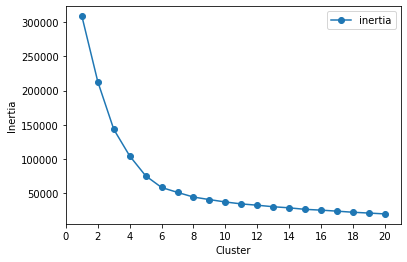

In [40]:
plot_data = (pd.concat(km_list, axis=1)
             .T
             [['clusters','inertia']]
             .set_index('clusters'))

ax = plot_data.plot(marker='o',ls='-')
ax.set_xticks(range(0,21,2))
ax.set_xlim(0,21)
ax.set(xlabel='Cluster', ylabel='Inertia');
### END SOLUTION

In [151]:
from sklearn.cluster import KMeans
### BEGIN SOLUTION
km = KMeans(n_clusters = 5 ,init='k-means++', n_init = 10 ,max_iter=300, 
                        tol=0.0001,  random_state= 111  , algorithm='elkan')
km = km.fit(df_final)

df['kmeans'] = km.predict(df_final)

In [152]:
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100),kmeans
0,1,Male,19,15,39,0
1,2,Male,21,15,81,4
2,3,Female,20,16,6,0
3,4,Female,23,16,77,4
4,5,Female,31,17,40,0


In [153]:
df.shape

(200, 6)

In [154]:
k_segment=df.groupby(['kmeans'],as_index=False).agg( Total_Subscriber=('CustomerID','count'),
                                                     Average_Income=('Annual Income (k$)','mean'),
                                                     Average_Age=('Age','mean'),
                                                     Spending_Score=('Spending Score (1-100)','mean'))

In [155]:
k_segment.sort_values('Average_Income',ascending=False)

,kmeans,Total_Subscriber,Average_Income,Average_Age,Spending_Score
1,1,36,87.750000,40.666667,17.583333
2,2,39,86.538462,32.692308,82.128205
3,3,79,55.291139,43.088608,49.569620
0,0,23,26.304348,45.217391,20.913043
4,4,23,26.304348,25.521739,78.565217


In [156]:
df.groupby(['kmeans','Gender'],as_index=False).agg(Average_Income=('Annual Income (k$)','mean'),
                                          Total_Subscriber=('CustomerID','count'),
                                          Spending_Score=('Spending Score (1-100)','mean'))

,kmeans,Gender,Average_Income,Total_Subscriber,Spending_Score
0,0,Female,27.357143,14,21.714286
1,0,Male,24.666667,9,19.666667
2,1,Female,89.823529,17,22.764706
3,1,Male,85.894737,19,12.947368
4,2,Female,86.047619,21,81.666667
5,2,Male,87.111111,18,82.666667
6,3,Female,55.347826,46,49.065217
7,3,Male,55.212121,33,50.272727
8,4,Female,26.642857,14,79.142857
9,4,Male,25.777778,9,77.666667


In [157]:
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100),kmeans
0,1,Male,19,15,39,0
1,2,Male,21,15,81,4
2,3,Female,20,16,6,0
3,4,Female,23,16,77,4
4,5,Female,31,17,40,0


In [158]:
#### 

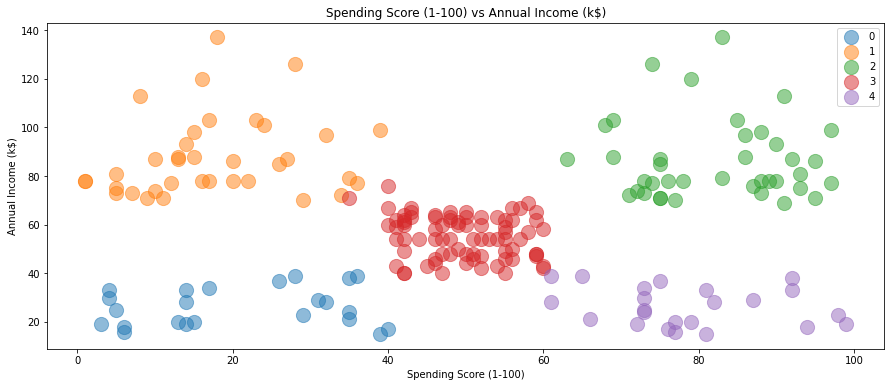

In [160]:
plt.figure(1 , figsize = (15 , 6))
for a in [0,1,2,3,4]:
    plt.scatter(x = 'Spending Score (1-100)' , y = 'Annual Income (k$)' , data = df[df['kmeans'] == a] ,
                s = 200 , alpha = 0.5 , label = a)
plt.xlabel('Spending Score (1-100)'), plt.ylabel('Annual Income (k$)') 
plt.title('Spending Score (1-100) vs Annual Income (k$)')
plt.legend()
plt.show()

## Anglomerative Hierarchi

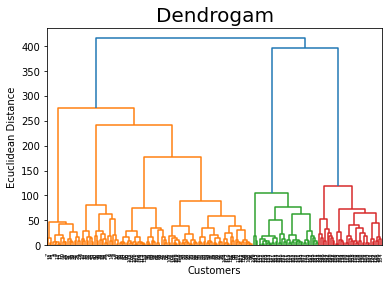

In [178]:
import scipy.cluster.hierarchy as sch

dendrogram = sch.dendrogram(sch.linkage(df_final, method = 'ward'))
plt.title('Dendrogam', fontsize = 20)
plt.xlabel('Customers')
plt.ylabel('Ecuclidean Distance')
plt.show()

We see from the dendrogram that we will choose five cluster 

In [184]:
from sklearn.cluster import AgglomerativeClustering
### BEGIN SOLUTION
ag = AgglomerativeClustering(n_clusters=5, linkage='ward', compute_full_tree=True)
ag = ag.fit(df_final)
df['agglom'] = ag.fit_predict(df_final)

In [185]:
df.groupby(['agglom'],as_index=False).agg( Total_Subscriber=('CustomerID','count'),
                                                     Average_Income=('Annual Income (k$)','mean'),
                                                     Average_Age=('Age','mean'),
                                                     Spending_Score=('Spending Score (1-100)','mean')).sort_values('Average_Income',ascending=False)

,agglom,Total_Subscriber,Average_Income,Average_Age,Spending_Score
1,1,38,87.000000,40.394737,18.631579
2,2,39,86.538462,32.692308,82.128205
0,0,80,54.087500,42.787500,50.350000
4,4,23,26.304348,45.217391,20.913043
3,3,20,24.950000,24.850000,81.000000


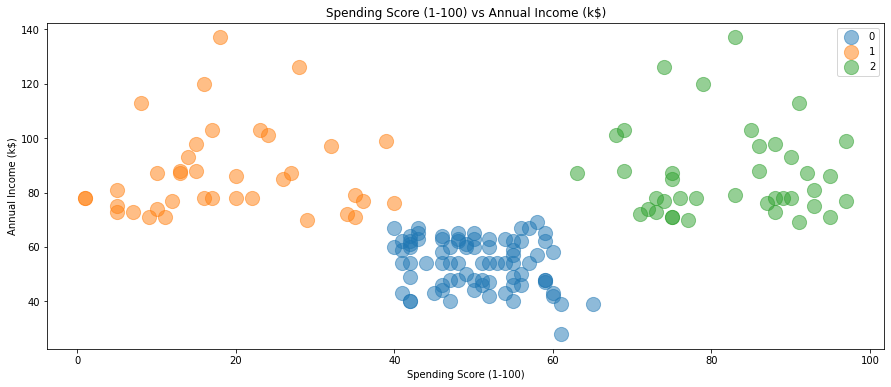

In [186]:
plt.figure(1 , figsize = (15 , 6))
for a in [0,1,2]:
    plt.scatter(x = 'Spending Score (1-100)' , y = 'Annual Income (k$)' , data = df[df['agglom'] == a] ,
                s = 200 , alpha = 0.5 , label = a)
plt.xlabel('Spending Score (1-100)'), plt.ylabel('Annual Income (k$)') 
plt.title('Spending Score (1-100) vs Annual Income (k$)')
plt.legend()
plt.show()

In [187]:
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100),kmeans,agglom,dbscan
0,1,Male,19,15,39,0,4,-1
1,2,Male,21,15,81,4,3,-1
2,3,Female,20,16,6,0,4,-1
3,4,Female,23,16,77,4,3,-1
4,5,Female,31,17,40,0,4,-1


## DBSCAN

In [188]:
from sklearn.cluster import DBSCAN
db=DBSCAN(eps=3,min_samples=4,metric='euclidean')

In [189]:
model=db.fit(df_final)

In [190]:
db.labels_

array([-1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1], dtype=int64)

In [191]:
df['dbscan'] =db.labels_

In [192]:
df.groupby(['dbscan'],as_index=False).agg( Total_Subscriber=('CustomerID','count'),
                                                     Average_Income=('Annual Income (k$)','mean'),
                                                     Average_Age=('Age','mean'),
                                                     Spending_Score=('Spending Score (1-100)','mean')).sort_values('Average_Income',ascending=False)

,dbscan,Total_Subscriber,Average_Income,Average_Age,Spending_Score
0,-1,200,60.56,38.85,50.2


We can differentiate the cluster using DBscan algorithm


### Take Away Points
- We can use Elbow method to determine number of cluster but we have to evaluate the cluster using data aggregation to measure the diffent between each data according our bussines case 
- Another method to determine the cluster is using Endogram and evalute is result using clustering algorithm 
- DBscan should be determine the cluter, but somehow the result is not good and need to check whether any parameter that should be tuning
- Next project could be done using another data as the features to form cluster and other clustering algoritm